1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

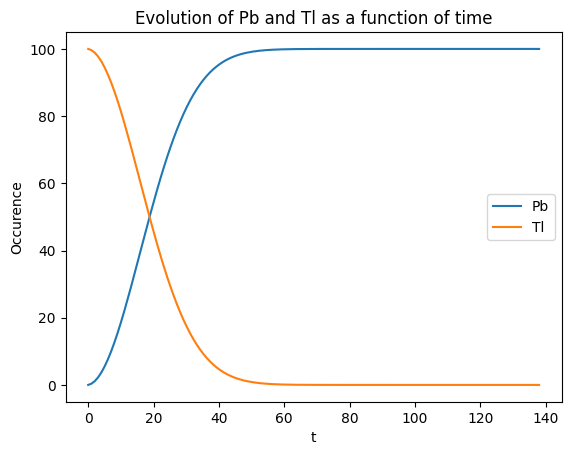

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Tl = []
Pb = []

#At t=0, we have a sample of 1000 Thallium and 0 of Lead atoms
#my computer does not support 1000 Thallium so I put 100..
Tl.append(100)
Pb.append(0)

#probability
def p(t):
    #From minute to seconds
    tho = 3.052*60
    return 1 - 2**(-t/tho)

#at each time-step (1 second) we need to decide whether each Tl atome has
#decayed or not
t = 1
while Pb[t-1] < 100:
    decayed = Tl[t-1]*p(t)
    Tl.append(Tl[t-1] - decayed)
    Pb.append(Pb[t-1] + decayed)
    t = t + 1
    
#We plot the evolution of the two sets as a function of time
fig = plt.figure()
x = np.linspace(0, t, t)
plt.title("Evolution of Pb and Tl as a function of time")
plt.xlabel("t")
plt.ylabel("Occurence")
plt.plot(x, Pb, label = "Pb")
plt.plot(x, Tl, label = "Tl")
plt.legend(loc="best")

We first compute the CDF
$$
F_X(t) = \int_0^x f(t) dt = \int_0^x 2^{-x/\tau}*\frac{\ln 2}{\tau} = 1 - 2^{-x/\tau}  = y
$$

inverting and solving for $x$:

$$x = F^{-1}(t) = -\tau * \frac{\ln{(1-t)}}{\ln 2}$$

2026.3135547453087


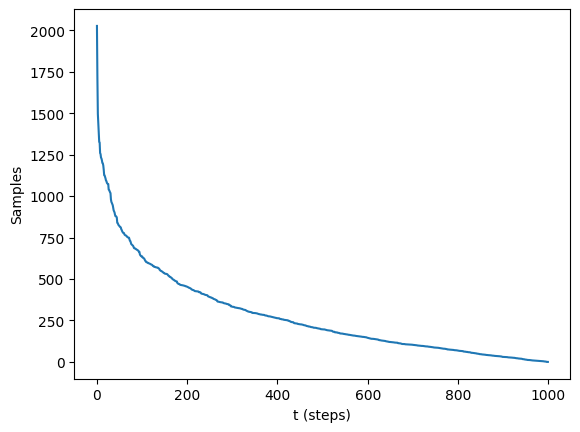

In [2]:
#inverse transform method
def inverse_transform(t):
    #From minute to seconds
    tho = 3.052*60
    return -tho * np.log(1-t)/np.log(2)

#Create random numbers
rand = np.random.random(1000)
decay_t = inverse_transform(rand) # apply the inverse of the CDF
print(decay_t.max())
plt.plot(np.sort(decay_t)[::-1])
plt.xlabel('t (steps)')
plt.ylabel('Samples')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Integral using the Hit/Miss method: 1.34592
estimation of the error 0.0012928859459152332
Integral using the mean value method: 1.3472999706792566
estimation of the error 0.0014630359009078575


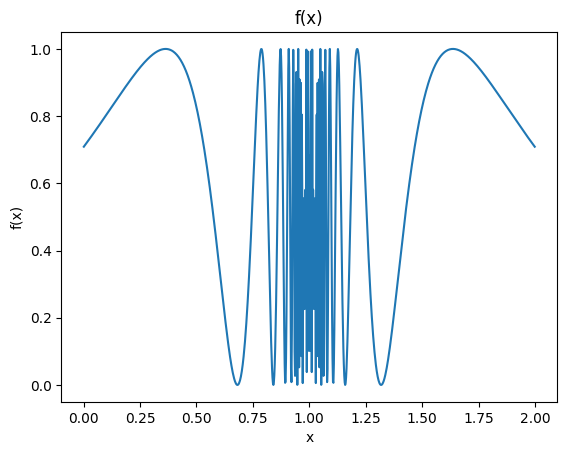

In [3]:
from scipy import stats

#defining the function
def func(x):
    return np.sin(1/(1-x))**2

n = 1000
x = np.linspace(0.001, 1.999, n)

fig = plt.figure()
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, func(x))

# Monte Carlo integration => Hit/Miss method
N = 100000
count = 0
y = np.zeros(N)
for i in range(N):
    x = 2 * np.random.random()
    y[i] = np.random.random()
    if y[i] < func(x): count += 1
I = 2 * count / N
print("Integral using the Hit/Miss method:", I)

#estimate the error
error = np.sqrt(2*(y*y).sum()/N - 2*y.mean()**2)/np.sqrt(N)
print("estimation of the error" , error )
    
    
#Mean value method
sum = 0
y = np.zeros(N)
for i in range(N):
    x = 2 * np.random.random() 
    y[i] = func(x)
    
#We apply the formula
Im = (2/N)*np.sum(y)
print("Integral using the mean value method:", Im)
#As we can see, the two method, Hit/Miss and the Mean value method are close to each other

#estimate the error
error = np.sqrt(2*(y*y).sum()/N - 2*y.mean()**2)/np.sqrt(N)
print("estimation of the error" , error )

#We can see that the error estimation is smaller for the Hit/Miss method. Therefore, we can see that the hit/miss
#method is more precise concerning the Hit/Miss method. Our value for the Hit/Miss methode si closer to the real value

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [4]:
def func(param):
    res = 0
    for p in param: 
        res += p**2
    if (res <= 1):
        return 1
    else:
        return 0
    
# Monte Carlo integration 
N = 100000
count = 0
dim = 2
for i in range(N):
    x = np.random.random() 
    y = np.random.random()     
    if func([x,y]) == 1:
        count += 1
        
#the formula is : (b-a)(d-c)/N with x and y being between -1 and 1 so : 
#a = -1 , c = -1, b = 1, d = 1
#(b-a) = 2, (d-c) = 2
#we have 2**dim
I = 2**2 * count / N
print("Integral using the Hit/Miss method:", I) 

#We do the same for a dim  = 10
dim = 10
count = 0
for i in range(N):
    param = []
    for i in range(dim):
        param.append(np.random.random())
        
    if func(param) == 1:
        count += 1

I10 = 2**dim * count / N
print("Integral using the Hit/Miss method for a 10D circle:", I10)    

Integral using the Hit/Miss method: 3.14304
Integral using the Hit/Miss method for a 10D circle: 2.49856


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [5]:
def w(x):
    return 1/np.sqrt(x)

def func(x):
    return (x**(-1/2))/(np.exp(x)+1)

N = 10000

x = np.random.random(N)**2
#integral from 0 to 1 of w(x) : W(x) = 2
I = 1/N * np.sum(func(x)/w(x))*2

# estimate
print("IS integral:", I)

IS integral: 0.8364368761458073
